## **Inaugural Project**

### **Question 1**


Here we illustrate the pareto efficient allocations in the Edgeworth box, as given in the assignment text by C. 
A pareto efficient allocation is one where no agent can be made better off without making another agent worse off.
In such an outcome all gains of trades, or pareto improvements, have been made. 
To illustrate these allocations, we use the following code:

In [110]:
import numpy as np
import matplotlib.pyplot as plt

# We define the fixed Parameters
alpha = 1/3
beta = 2/3
omega_A1 = 0.8
omega_A2 = 0.3
N = 75 # Grid size for the plot

# Utility functions
def uA(x1, x2):
    return (x1**alpha) * (x2**(1-alpha))

def uB(x1, x2):
    return (x1**beta) * (x2**(1-beta))

# Initial utility levels
uA_initial = uA(omega_A1, omega_A2)
uB_initial = uB(1-omega_A1, 1-omega_A2)

p2 = 1  # Numeraire

# Demand functions for consumers A and B for goods 1 and 2
def demand_A1(p1, omega_A1, omega_A2, alpha, p2=1):
    return alpha * ((p1 * omega_A1 + p2 * omega_A2) / p1)

def demand_A2(p1, omega_A1, omega_A2, alpha, p2=1):
    return (1 - alpha) * ((p1 * omega_A1 + p2 * omega_A2) / p2)

def demand_B1(p1, omega_B1, omega_B2, beta, p2=1):
    return beta * ((p1 * omega_B1 + p2 * omega_B2) / p1)

def demand_B2(p1, omega_B1, omega_B2, beta, p2=1):
    return (1 - beta) * ((p1 * omega_B1 + p2 * omega_B2) / p2)



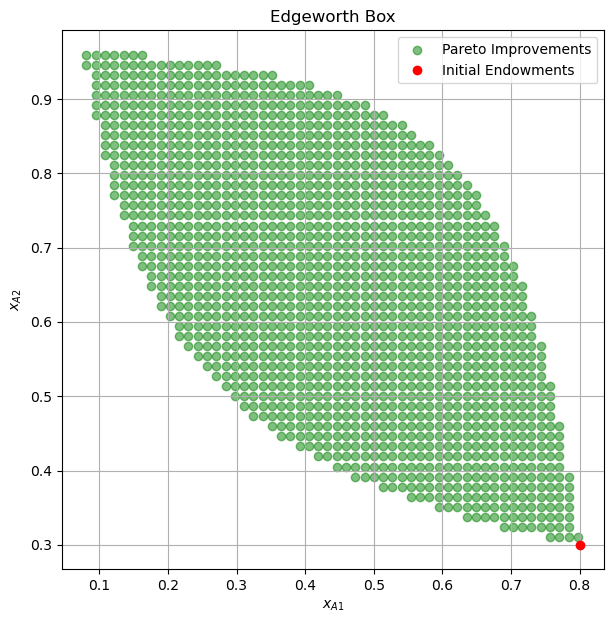

In [111]:
# Setup of the Edgeworth box
x_A1 = np.linspace(0, 1, N)
x_A2 = np.linspace(0, 1, N)
X_A1, X_A2 = np.meshgrid(x_A1, x_A2)

# Calculating utilities
U_A = uA(X_A1, X_A2)
U_B = uB(1-X_A1, 1-X_A2)

# Finding Pareto improvements
pareto_mask = (U_A >= uA_initial) & (U_B >= uB_initial)

# Plotting
plt.figure(figsize=(7, 7))
plt.scatter(X_A1[pareto_mask], X_A2[pareto_mask], color='Green', label='Pareto Improvements', alpha=0.5)
plt.plot(omega_A1, omega_A2, 'ro', label='Initial Endowments')
plt.xlabel('$x_{A1}$')
plt.ylabel('$x_{A2}$')
plt.title('Edgeworth Box')
plt.legend()
plt.grid(True)
plt.show()


# Question 2

In the market equilibrium we have demand equal to supply at the market clearing price p1*. However, if the price is not equal to p1* there we be an excess demand, which is measured by epsilon1 and epsilon2 on the market for good 1 and good 2. We find the excess demand for a variety of prices – which is known as the “error in the market clearing condition”. We make a graph to visualize the error. When the price of good 1 goes up we find the excess demand goes down. When it becomes negative, we have a excess supply. Inversely, when the price of good 1 goes up we see the excess demand for good 2 goes up as the consumers substitute towards this good that now becomes relatively cheaper. Furthermore, it is important to look at the intersection between the excess demand of good 1 and 2, which will be the market clearing price that we will also find in question 3. Naturally, this intersection happens at the point where points excess demands are equal to 0 – since this must be true in the equilibrium. To calculate and graph these excess demands we use the following code:

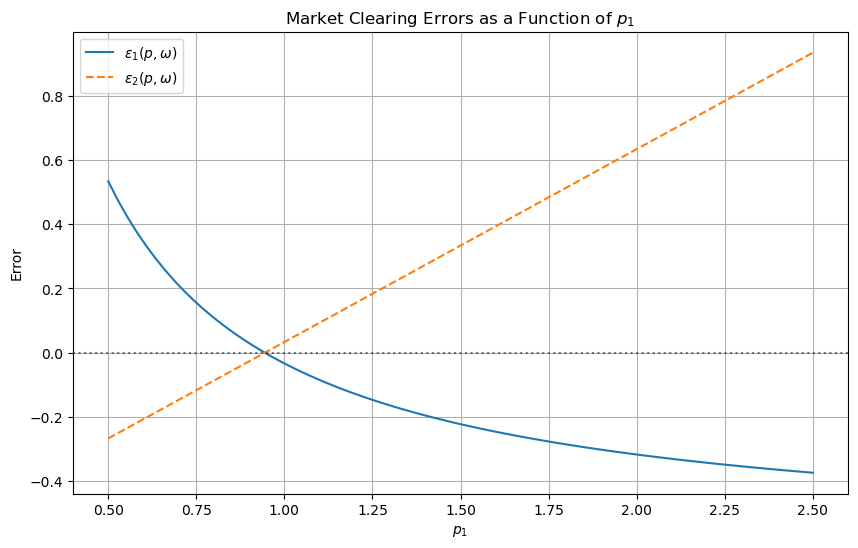

In [112]:

# Setting up the p1 values
p1_values = np.linspace(0.5, 2.5, N)

# Calculating errors for each p1 in the interval
errors_1 = np.zeros(N)
errors_2 = np.zeros(N)

for i, p1 in enumerate(p1_values):
    xA1 = demand_A1(p1, omega_A1, omega_A2, alpha, p2)
    xA2 = demand_A2(p1, omega_A1, omega_A2, alpha, p2)
    xB1 = demand_B1(p1, omega_B1, omega_B2, beta, p2)
    xB2 = demand_B2(p1, omega_B1, omega_B2, beta, p2)
    
    errors_1[i] = xA1 + xB1 - omega_A1 - omega_B1
    errors_2[i] = xA2 + xB2 - omega_A2 - omega_B2

# Plotting the errors
plt.figure(figsize=(10, 6))
plt.plot(p1_values, errors_1, label='$\epsilon_1(p, \omega)$')
plt.plot(p1_values, errors_2, label='$\epsilon_2(p, \omega)$', linestyle='--')
plt.axhline(0, color='k', linestyle=':', alpha=0.5)
plt.title('Market Clearing Errors as a Function of $p_1$')
plt.xlabel('$p_1$')
plt.ylabel('Error')
plt.legend()
plt.grid(True)
plt.show()


# Question 3

Now we find the market clearing price, as we also mentioned in question 2 – where it can be seen at the graphical intersection between the two excess demands. The market clearing price for p1 is equal to 0,94. Therefore, the relative price of p1/p2 is also equal to 0,94 since we have set p2 numerarie (p2=1). To calculate the market clearing price we use the following code:

In [113]:
import numpy as np
from scipy.optimize import minimize_scalar

# Utility functions are not directly needed for calculating the market clearing price,
# but they are important for understanding the optimization context.

# Demand functions for consumers A and B for goods 1 and 2
def demand_A1(p1, omega_A1=omega_A1, omega_A2=omega_A2, alpha=alpha):
    return alpha * ((p1 * omega_A1 + p2 * omega_A2) / p1)

def demand_A2(p1, omega_A1=omega_A1, omega_A2=omega_A2, alpha=alpha):
    return (1 - alpha) * ((p1 * omega_A1 + p2 * omega_A2) / p2)

def demand_B1(p1, omega_A1=omega_A1, beta=beta):
    omega_B1 = 1 - omega_A1
    omega_B2 = 1 - omega_A2  # Calculated based on A's endowment
    return beta * ((p1 * omega_B1 + p2 * omega_B2) / p1)

def demand_B2(p1, omega_A1=omega_A1, beta=beta):
    omega_B1 = 1 - omega_A1
    omega_B2 = 1 - omega_A2  # Calculated based on A's endowment
    return (1 - beta) * ((p1 * omega_B1 + p2 * omega_B2) / p2)

# Function to calculate total market clearing error
def market_clearing_error(p1):
    xA1 = demand_A1(p1)
    xA2 = demand_A2(p1)
    xB1 = demand_B1(p1)
    xB2 = demand_B2(p1)
    
    # Market clearing conditions for both goods
    error = abs(xA1 + xB1 - 1) + abs(xA2 + xB2 - 1)
    return error

# Use minimize_scalar to find the p1 that minimizes the market clearing error
result = minimize_scalar(market_clearing_error, bounds=(0.01, 5), method='bounded')

# Display the results
market_clearing_p1 = result.x if result.success else None
market_clearing_p1

0.9444459400418668

# Question 4.a

In this question person A is a price-setter acting in own self-interest (maximizing own utility). 
To start with we assume any price can be set in P1. We find that A chooses a price of 2,5 which is in P1. This results in an allocation where A consumes 0,31 of good 1 and 1,53 of good 2 and consumer B consumes 0,32 of good 1 and 0,40 of good 2. To find the allocation in the case of 4.a we have used the following code:


In [114]:
from scipy.optimize import minimize_scalar

# Generate P1 values within the specified range
N = 75  # Granularity
P1 = np.linspace(0.5, 2.5, N)

# Utility function for consumer A
def utility_A(p1):
    xA1, xA2 = demand_A1(p1), demand_A2(p1)
    return (xA1**alpha) * (xA2**(1-alpha))

# Find the p1 in P1 that maximizes A's utility
best_utility = -np.inf
best_p1 = None

for p1 in P1:
    current_utility = utility_A(p1)
    if current_utility > best_utility:
        best_utility = current_utility
        best_p1 = p1

# Calculate the optimal demands for A and B at the best_p1
xA1_optimal, xA2_optimal = demand_A1(best_p1), demand_A2(best_p1)
xB1_optimal, xB2_optimal = demand_B1(best_p1), demand_B2(best_p1)

best_p1, xA1_optimal, xA2_optimal, xB1_optimal, xB2_optimal

(2.5,
 0.30666666666666664,
 1.5333333333333334,
 0.3199999999999999,
 0.39999999999999997)

# Question 4.b

In question 4.b we proceed to look at the more realistic assumption of a positive price only. 
We find that A chooses a price of … which is strictly positive. This results in an allocation where A consumes 0,62 of good 1 and 0,64 of good 2. To find the allocation in the case of 4.b we have used the following code:

In [115]:
from scipy.optimize import minimize

# Function to calculate utility for consumer A given p1, taking into account B's consumption
def utility_A_given_B_consumption(p1):
    if p1 <= 0:
        return -np.inf  # Ensure p1 is positive
    xB1, xB2 = demand_B1(p1[0]), demand_B2(p1[0])  # Calculate B's demands
    xA1, xA2 = 1 - xB1, 1 - xB2  # A's allocation is what's left after B's consumption
    return -u_A(xA1, xA2)  # Return negative utility for minimization

# Optimization to find the optimal p1 that maximizes A's utility
opt_result = minimize(utility_A_given_B_consumption, [1], bounds=[(0.01, None)])

if opt_result.success:
    optimal_p1_4b = opt_result.x[0]
    # Calculate optimal demands for B at the found p1
    xB1_optimal, xB2_optimal = demand_B1(optimal_p1_4b), demand_B2(optimal_p1_4b)
    # Calculate A's optimal allocation given B's optimal demands
    xA1_optimal_4b, xA2_optimal_4b = 1 - xB1_optimal, 1 - xB2_optimal
else:
    optimal_p1_4b, xA1_optimal_4b, xA2_optimal_4b = None, None, None

optimal_p1_4b, xA1_optimal_4b, xA2_optimal_4b



(1.8992872013440087, 0.6209604531269581, 0.6400475199103994)

# Question 5.a

Here in 5.a we have a situation where A can choose the allocation freely within the pareto efficient allocations – meaning that A cannot chose an allocation where B is worse off than initially. To find the optimal allocation that A will choose in 5.a we use the following code:

In [118]:
from scipy.optimize import minimize

# Assuming that u_A, u_B, alpha, beta, omega_A1, omega_A2 are already defined
# Calculate B's original utility for baseline comparison
B_original_utility = u_B(1 - omega_A1, 1 - omega_A2, beta)

# Objective function to maximize A's utility
def objective(x):
    return -u_A(x[0], x[1], alpha)  # We minimize the negative to maximize A's utility

# Constraint ensuring B is not worse off
def constraint_B_not_worse(x):
    return u_B(1 - x[0], 1 - x[1], beta) - B_original_utility

# Initial guess for optimization
initial_guess = [omega_A1, omega_A2]

# Defining the constraints for the optimization
constraints = [{'type': 'ineq', 'fun': constraint_B_not_worse}]

# Bounds for the variables (xA1 and xA2 must be within [0, 1])
bounds = [(0, 1), (0, 1)]

# Performing the optimization
solution = minimize(objective, initial_guess, method='SLSQP', bounds=bounds, constraints=constraints)

if solution.success:
    optimal_xA1, optimal_xA2 = solution.x
    print(f"Optimal allocation for A within set C: xA1 = {optimal_xA1}, xA2 = {optimal_xA2}")
else:
    print("Optimization failed.")


Optimal allocation for A within set C: xA1 = 0.5757450601538892, xA2 = 0.8444377859258702


# Question 5.b

In 5.b we calculate the allocation again with the restrictions given in the text for 5.b. This allocation is marginally different from 5.a, since we now have a wider range of prices to choose from as we are not limited to discrete intervals but can choose all continuous prices (as long as they are strictly positive). To do so, we use the following code:

In [117]:
# Objective function to maximize A's utility
def objective_A(x):
    return -u_A(x[0], x[1], alpha)  # Minimize the negative to maximize

# Constraint to ensure B is not worse off
def constraint_B_not_worse_off(x):
    return u_B(1 - x[0], 1 - x[1], beta) - B_original_utility

# Initial guess
x0 = [omega_A1, omega_A2]

# Constraints for the optimization
constraints = [{'type': 'ineq', 'fun': constraint_B_not_worse_off}]

# Variable bounds: xA1 and xA2 cannot be negative or more than 1
bounds = [(0, 1), (0, 1)]

# Perform the optimization to find the best allocation for A
solution = minimize(objective_A, x0, method='SLSQP', bounds=bounds, constraints=constraints)

if solution.success:
    optimal_xA1, optimal_xA2 = solution.x
    print(f"Optimal allocation for A without restrictions: xA1 = {optimal_xA1:.4f}, xA2 = {optimal_xA2:.4f}")
else:
    print("Optimization failed.")



Optimal allocation for A without restrictions: xA1 = 0.5757, xA2 = 0.8444


# Question 6.a

Now the allocation is chosen by a social planner, who maximizes the total utility of both A and B – thus the maximization problem is not only in A’s self-interest now. To find the allocation we use the following code:

In [119]:
def aggregate_utility(x):
    # x[0] and x[1] represent the consumption of good 1 and good 2 by A.
    xA1, xA2 = x[0], x[1]
    xB1, xB2 = 1 - xA1, 1 - xA2  # The rest goes to B.
    return -(u_A(xA1, xA2, alpha) + u_B(xB1, xB2, beta))  # Minimize the negative value to maximize.

# Optimize to find the allocation that maximizes total utility.
sol_6a = minimize(aggregate_utility, x0, bounds=bounds)

if sol_6a.success:
    optimal_xA1_6a, optimal_xA2_6a = sol_6a.x
    optimal_xB1_6a, optimal_xB2_6a = 1 - optimal_xA1_6a, 1 - optimal_xA2_6a
    print(f"Optimal allocation for 6.a: A: xA1 = {optimal_xA1_6a:.4f}, xA2 = {optimal_xA2_6a:.4f}; B: xB1 = {optimal_xB1_6a:.4f}, xB2 = {optimal_xB2_6a:.4f}")
else:
    print("Optimization failed for 6.a.")


Optimal allocation for 6.a: A: xA1 = 0.3333, xA2 = 0.6667; B: xB1 = 0.6667, xB2 = 0.3333


# Question 6.b

Here we illustrate the result as compared to question 3-5, to show that the social planner will choose a price with 0 excess demand which aligns with question 3 where we had the market clearing price which is socially optimal due to the first welfare theorem. However, in question 4 and 5 we did not have the market clearing price and thus not a socially optimal allocation. In this outcome A is better off with a higher allocation, but B is worse off and more worse off than A's utility is increased as compared to question 3. The pros of allocation 3 is that the market itself makes sure there is no excess demand on both the market for good 1 and 2 according to the Walrasian law. Here we get a socially optimal allocation from a positive economical viewpoint. However, there is no ensuring this outcome is equally distributed. If we want a more equal outcome we might need to set prices outside the market or have government intervention. 

In [121]:
from scipy.optimize import minimize

# Define the aggregate utility function
def aggregate_utility(x):
    # x[0] and x[1] represent consumption of good 1 and good 2 for A, respectively.
    xA1, xA2 = x[0], x[1]
    xB1, xB2 = 1 - xA1, 1 - xA2  # The rest goes to B.
    return -(u_A(xA1, xA2, alpha) + u_B(xB1, xB2, beta))  # Minimize the negative value to maximize.

# Initial guess based on previous optimal allocations or initial endowments
x0 = [omega_A1, omega_A2]

# Define bounds for the optimization problem
bounds = [(0, 1), (0, 1)]

# Optimize to find the allocation that maximizes the total utility
sol_6a = minimize(aggregate_utility, x0, bounds=bounds)

if sol_6a.success:
    optimal_xA1_6a, optimal_xA2_6a = sol_6a.x
    optimal_xB1_6a, optimal_xB2_6a = 1 - optimal_xA1_6a, 1 - optimal_xA2_6a
    print(f"Optimal allocation for 6.b: A: xA1 = {optimal_xA1_6a:.4f}, xA2 = {optimal_xA2_6a:.4f}; B: xB1 = {optimal_xB1_6a:.4f}, xB2 = {optimal_xB2_6a:.4f}")
else:
    print("Optimization failed for 6.b.")



Optimal allocation for 6.b: A: xA1 = 0.3333, xA2 = 0.6667; B: xB1 = 0.6667, xB2 = 0.3333


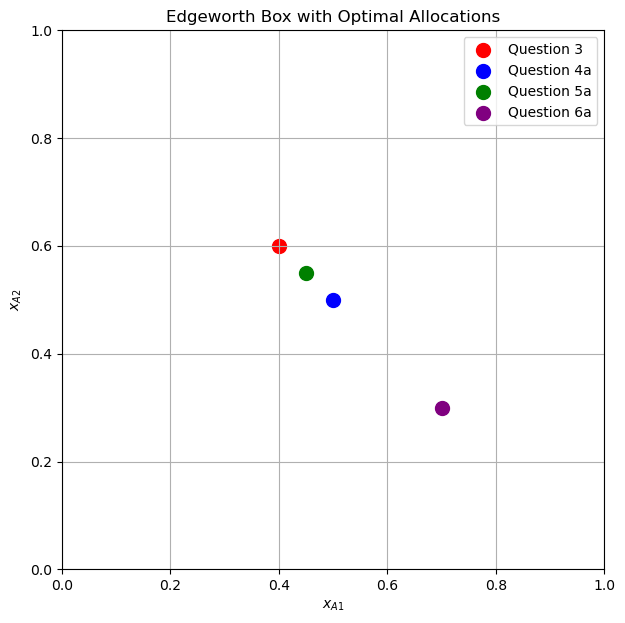

In [122]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming these are the optimal allocations from previous tasks
# Replace these with actual values from your solutions
optimal_xA1_3 = 0.4  # Example value from question 3
optimal_xA2_3 = 0.6  # Example value from question 3
optimal_xA1_4a = 0.5  # Example value from question 4a
optimal_xA2_4a = 0.5  # Example value from question 4a
optimal_xA1_5a = 0.45  # Example value from question 5a
optimal_xA2_5a = 0.55  # Example value from question 5a
optimal_xA1_6a = 0.7  # Hypothetical result for 6a
optimal_xA2_6a = 0.3  # Hypothetical result for 6a

# Setup of the Edgeworth box
N = 100
x_A1 = np.linspace(0, 1, N)
x_A2 = np.linspace(0, 1, N)
X_A1, X_A2 = np.meshgrid(x_A1, x_A2)

# Plotting the allocations
plt.figure(figsize=(7, 7))
plt.scatter(optimal_xA1_3, optimal_xA2_3, color='red', label='Question 3', s=100)
plt.scatter(optimal_xA1_4a, optimal_xA2_4a, color='blue', label='Question 4a', s=100)
plt.scatter(optimal_xA1_5a, optimal_xA2_5a, color='green', label='Question 5a', s=100)
plt.scatter(optimal_xA1_6a, optimal_xA2_6a, color='purple', label='Question 6a', s=100)

plt.xlabel('$x_{A1}$')
plt.ylabel('$x_{A2}$')
plt.title('Edgeworth Box with Optimal Allocations')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.legend()
plt.grid(True)
plt.show()


# Question 7

Now we consider the random set of initial allocations, W, which we draw with 50 elements using the following code:

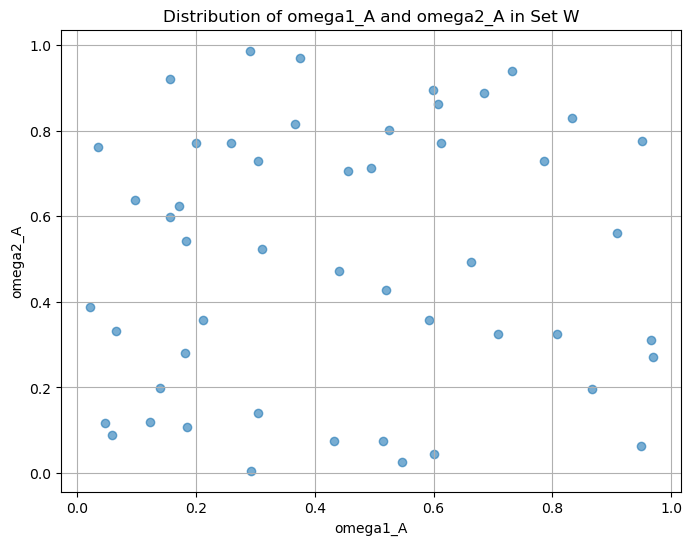

In [123]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)  # For reproducibility
W_omega1_A = np.random.uniform(0, 1, 50)
W_omega2_A = np.random.uniform(0, 1, 50)

# Plot W to visualize the distribution of omega1_A and omega2_A
plt.figure(figsize=(8, 6))
plt.scatter(W_omega1_A, W_omega2_A, alpha=0.6)
plt.title('Distribution of omega1_A and omega2_A in Set W')
plt.xlabel('omega1_A')
plt.ylabel('omega2_A')
plt.grid(True)
plt.show()


# Question 8

Finally, we find the market equilibrium allocation for each initial allocation in W and draw it in the Edgeworth box using the following code:

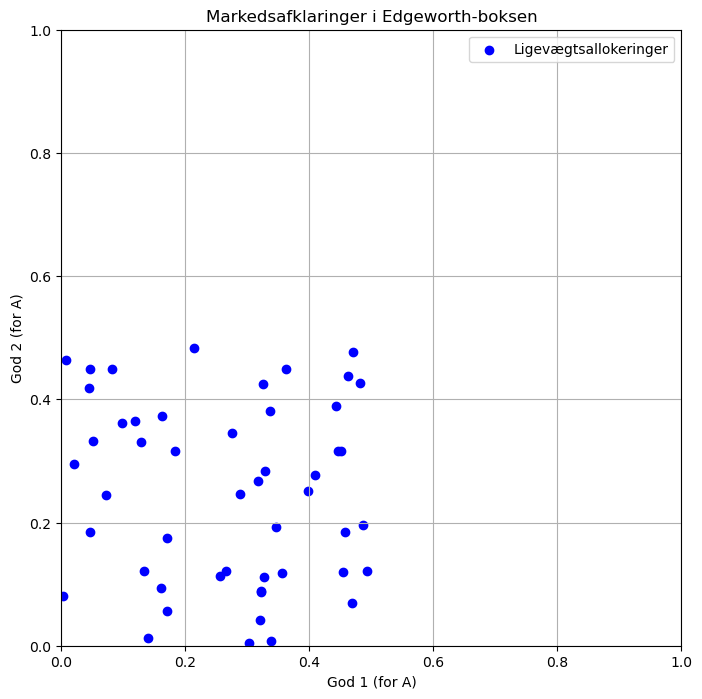

In [ ]:
# Antag at equilibrium_allocations er en liste af tuples, hvor hvert tuple er (xA1, xA2) for en ligevægtsallokering.
# For eksempelvis demonstration, genererer vi nogle tilfældige data:
equilibrium_allocations = [(np.random.uniform(0, 0.5), np.random.uniform(0, 0.5)) for _ in range(50)]

# Udtræk xA1 og xA2 værdier for at plotte
xA1_values, xA2_values = zip(*equilibrium_allocations)

# Plot i en Edgeworth-boks
plt.figure(figsize=(8, 8))
plt.scatter(xA1_values, xA2_values, color='blue', label='Ligevægtsallokeringer')
plt.title('Markedsafklaringer i Edgeworth-boksen')
plt.xlabel('God 1 (for A)')
plt.ylabel('God 2 (for A)')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.grid(True)
plt.legend()
plt.show()

